In [113]:
import csv
import numpy as np
import math
from random import randrange
import sklearn

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Reading and formatting the dataset

In [3]:
from pathlib import Path
import re

def read_dataset(file_path):
    file_path = Path(file_path)

    raw_text = file_path.read_text().strip()
    raw_docs = raw_text.split('\n')[4:]
#     ids_docs = []
#     keywords_docs = []
#     texts_docs = []
#     labels_docs = []
    ids = []
    keywords = []
    texts = []
    labels = []
    for line in raw_docs:
        
#         for line in doc.split('\n'):
        id_, keyword, text, label = line.split('\t')[0],line.split('\t')[2],line.split('\t')[4],line.split('\t')[5]
        ids.append(id_)
        keywords.append(keyword)
        texts.append(text)
        if(label=='0' or label=='1'):
            labels.append(0)
        else:
            labels.append(1)

    return ids, keywords, texts, labels

In [4]:
IDs,Keywords,Texts,Labels = read_dataset('dontpatronizeme_pcl.tsv')

# Segregating the keywords into positive and negative

In [5]:
pos_words = []
neg_words = []
for i in range(len(Labels)):
    print(Keywords[i])
    if(Labels[i]==1):
        if(Keywords[i] not in pos_words):
            pos_words.append(Keywords[i].lower())
    else:
        if(Keywords[i] not in neg_words):
            neg_words.append(Keywords[i].lower())

hopeless
migrant
immigrant
disabled
refugee
in-need
refugee
hopeless
homeless
in-need
migrant
vulnerable
women
poor-families
vulnerable
disabled
hopeless
migrant
disabled
immigrant
immigrant
vulnerable
homeless
vulnerable
refugee
women
migrant
hopeless
women
immigrant
homeless
refugee
disabled
disabled
migrant
homeless
homeless
hopeless
homeless
immigrant
disabled
hopeless
poor-families
vulnerable
refugee
in-need
in-need
vulnerable
immigrant
disabled
hopeless
disabled
women
disabled
disabled
homeless
migrant
homeless
in-need
homeless
poor-families
vulnerable
migrant
migrant
homeless
migrant
poor-families
vulnerable
refugee
migrant
women
migrant
refugee
homeless
vulnerable
vulnerable
homeless
women
vulnerable
poor-families
refugee
vulnerable
homeless
vulnerable
women
refugee
hopeless
in-need
poor-families
in-need
disabled
refugee
in-need
immigrant
immigrant
women
poor-families
immigrant
in-need
migrant
in-need
refugee
migrant
refugee
hopeless
women
homeless
vulnerable
immigrant
immigran

hopeless
in-need
in-need
refugee
refugee
poor-families
disabled
disabled
immigrant
poor-families
hopeless
migrant
in-need
vulnerable
in-need
vulnerable
in-need
women
immigrant
vulnerable
in-need
immigrant
immigrant
in-need
disabled
women
poor-families
homeless
poor-families
women
poor-families
vulnerable
poor-families
immigrant
poor-families
homeless
in-need
vulnerable
women
poor-families
poor-families
disabled
vulnerable
immigrant
homeless
migrant
disabled
in-need
refugee
homeless
refugee
hopeless
hopeless
hopeless
in-need
hopeless
vulnerable
women
women
in-need
immigrant
hopeless
refugee
refugee
hopeless
homeless
homeless
in-need
women
immigrant
migrant
women
disabled
vulnerable
refugee
homeless
migrant
poor-families
migrant
hopeless
migrant
vulnerable
vulnerable
migrant
vulnerable
homeless
hopeless
refugee
hopeless
vulnerable
homeless
poor-families
homeless
vulnerable
immigrant
disabled
homeless
immigrant
poor-families
homeless
in-need
disabled
vulnerable
poor-families
in-need
migra

homeless
in-need
immigrant
refugee
women
poor-families
poor-families
women
migrant
women
vulnerable
in-need
hopeless
in-need
poor-families
hopeless
immigrant
in-need
hopeless
hopeless
disabled
refugee
vulnerable
poor-families
immigrant
homeless
hopeless
disabled
vulnerable
disabled
women
refugee
poor-families
disabled
refugee
disabled
immigrant
migrant
poor-families
vulnerable
in-need
hopeless
in-need
migrant
hopeless
immigrant
women
poor-families
disabled
in-need
poor-families
poor-families
hopeless
homeless
in-need
hopeless
refugee
refugee
immigrant
hopeless
poor-families
women
immigrant
poor-families
women
refugee
immigrant
immigrant
in-need
in-need
poor-families
homeless
poor-families
disabled
women
hopeless
hopeless
hopeless
refugee
refugee
in-need
vulnerable
poor-families
poor-families
in-need
refugee
in-need
in-need
poor-families
in-need
women
poor-families
vulnerable
in-need
refugee
in-need
homeless
immigrant
in-need
refugee
migrant
hopeless
hopeless
women
disabled
hopeless
hom

in-need
hopeless
women
in-need
migrant
homeless
poor-families
hopeless
immigrant
migrant
migrant
disabled
migrant
refugee
vulnerable
women
disabled
vulnerable
disabled
women
disabled
disabled
women
poor-families
migrant
refugee
women
women
refugee
women
in-need
refugee
poor-families
homeless
disabled
women
homeless
homeless
in-need
migrant
migrant
poor-families
refugee
hopeless
disabled
homeless
migrant
poor-families
women
vulnerable
poor-families
disabled
women
poor-families
immigrant
hopeless
poor-families
poor-families
disabled
immigrant
disabled
refugee
refugee
in-need
disabled
women
immigrant
poor-families
homeless
women
in-need
vulnerable
immigrant
immigrant
poor-families
immigrant
hopeless
in-need
in-need
poor-families
migrant
homeless
immigrant
poor-families
women
in-need
homeless
disabled
vulnerable
homeless
poor-families
vulnerable
refugee
women
homeless
immigrant
hopeless
in-need
homeless
disabled
homeless
immigrant
hopeless
disabled
refugee
immigrant
immigrant
in-need
vulne

disabled
vulnerable
refugee
disabled
women
refugee
homeless
women
women
hopeless
homeless
poor-families
homeless
poor-families
hopeless
migrant
disabled
refugee
hopeless
women
refugee
in-need
disabled
in-need
homeless
vulnerable
homeless
women
immigrant
migrant
immigrant
hopeless
migrant
women
immigrant
vulnerable
women
women
disabled
vulnerable
refugee
in-need
disabled
homeless
refugee
homeless
vulnerable
women
immigrant
homeless
women
vulnerable
women
migrant
vulnerable
disabled
in-need
hopeless
immigrant
women
immigrant
vulnerable
hopeless
poor-families
homeless
poor-families
vulnerable
refugee
disabled
vulnerable
in-need
disabled
poor-families
hopeless
in-need
migrant
hopeless
disabled
poor-families
poor-families
vulnerable
women
in-need
in-need
migrant
refugee
vulnerable
migrant
hopeless
homeless
vulnerable
vulnerable
in-need
in-need
vulnerable
migrant
in-need
immigrant
homeless
disabled
disabled
vulnerable
immigrant
poor-families
homeless
refugee
homeless
hopeless
vulnerable
migr

hopeless
immigrant
disabled
refugee
poor-families
poor-families
in-need
homeless
in-need
immigrant
vulnerable
homeless
homeless
hopeless
disabled
poor-families
homeless
women
poor-families
migrant
in-need
women
migrant
disabled
homeless
migrant
disabled
vulnerable
immigrant
refugee
immigrant
refugee
hopeless
homeless
refugee
immigrant
women
refugee
disabled
homeless
hopeless
homeless
refugee
vulnerable
women
refugee
disabled
in-need
women
women
migrant
hopeless
migrant
poor-families
vulnerable
vulnerable
immigrant
immigrant
refugee
women
vulnerable
homeless
hopeless
vulnerable
refugee
in-need
immigrant
women
poor-families
disabled
in-need
refugee
homeless
hopeless
vulnerable
hopeless
migrant
poor-families
migrant
migrant
in-need
vulnerable
poor-families
hopeless
homeless
disabled
vulnerable
poor-families
in-need
women
vulnerable
immigrant
women
immigrant
poor-families
homeless
women
in-need
hopeless
disabled
vulnerable
in-need
disabled
vulnerable
hopeless
in-need
homeless
refugee
migra

women
in-need
migrant
disabled
vulnerable
hopeless
women
homeless
vulnerable
disabled
disabled
poor-families
poor-families
women
in-need
women
immigrant
immigrant
refugee
immigrant
hopeless
women
in-need
disabled
homeless
refugee
migrant
migrant
in-need
hopeless
homeless
refugee
vulnerable
women
migrant
hopeless
in-need
women
women
homeless
in-need
in-need
hopeless
in-need
homeless
in-need
hopeless
refugee
migrant
refugee
refugee
immigrant
migrant
in-need
immigrant
homeless
hopeless
homeless
homeless
homeless
immigrant
women
women
immigrant
refugee
homeless
migrant
migrant
hopeless
poor-families
immigrant
hopeless
women
migrant
homeless
women
immigrant
migrant
disabled
in-need
refugee
in-need
in-need
immigrant
poor-families
women
poor-families
in-need
in-need
vulnerable
poor-families
immigrant
homeless
disabled
women
hopeless
disabled
refugee
homeless
vulnerable
vulnerable
poor-families
homeless
women
immigrant
migrant
homeless
vulnerable
in-need
vulnerable
refugee
refugee
poor-familie

# Set of keywords as features which depicts patrionizing or condescending

In [6]:
set(Keywords)
custom_Keywords = ['dis','able',
 'home','less',
 'hope',
 'need',
 'migr',
 'poor',
 'refuge',
 'vulner',
 'women',]

In [7]:
custom_Keywords


['dis',
 'able',
 'home',
 'less',
 'hope',
 'need',
 'migr',
 'poor',
 'refuge',
 'vulner',
 'women']

In [8]:
lemma = nltk.wordnet.WordNetLemmatizer()

In [9]:
pos_words

['disabled',
 'hopeless',
 'homeless',
 'in-need',
 'poor-families',
 'women',
 'vulnerable',
 'refugee',
 'immigrant',
 'migrant']

In [10]:
lemmatize_words = dict()
lemmatize_frequency = dict()
for word in custom_Keywords:
#     print(str(word))
    print(lemma.lemmatize(word))

dis
able
home
le
hope
need
migr
poor
refuge
vulner
woman


In [11]:
ps = PorterStemmer()
for i in neg_words:
    print(lemma.lemmatize(ps.stem(i)))

hopeless
migrant
immigr
disabl
refuge
in-ne
homeless
vulner
woman
poor-famili


In [23]:
import pickle
senti = pickle.load(open('sentimentmap','rb'))

dict_values(['NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'PO

In [74]:
k=list(senti.values())
# print(senti(k[0]))
sen_label = []
ct=0
for i in range(8639):
    sen_label.append(k[i])
sen_label.append('NEGATIVE')
for i in range(8639,len(Texts)-1):
    print(i)
    sen_label.append(k[i])

8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838


10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467


In [75]:
len(sen_label)

10469

In [54]:
Texts[8639],IDs[8639],Labels[8639]

('', '8640', 0)

In [42]:
Texts[10468]

'""" Guinness World Record of 540lbs of 7-layer munchy monstrosity , "" he tweeted . "" Delivered immediately to LA \'s Midnight Mission for the homeless . A good day . """'

# Function that calculates the feature vector for each review

In [79]:
def feature_extraction(sentence,labl):
    words=[]
    feature=[]
    pro = ["I", "me", "mine", "my", "you", "your", "yours", "we", "us", "ours", "them"]
    for i in sentence.split(' '):
        words.append(i.lower().replace(".",'').replace(",",'').replace("?",''))
#     print(words)
    x1=0
    x2=0
#     if
    for j in words:
        for k in custom_Keywords:
            if k in j:
                x1+=1
        if j in pro:
            x2+=1
    if(labl=='NEGATIVE'):
        x3=0
    else:
        x3=1
    x4=len(i)
    x5=1
    feature = [x1,x2,x3,x4,x5]
    return feature

# Calculating Features for each review

In [81]:
features = []
for i in range(len(Texts)):
    features.append(feature_extraction(Texts[i],sen_label[i]))

In [82]:
(features)

[[2, 1, 0, 1, 1],
 [2, 1, 1, 3, 1],
 [2, 0, 0, 2, 1],
 [3, 0, 0, 1, 1],
 [2, 3, 0, 2, 1],
 [2, 4, 0, 1, 1],
 [2, 0, 0, 1, 1],
 [2, 0, 0, 3, 1],
 [2, 0, 1, 1, 1],
 [1, 0, 0, 1, 1],
 [2, 1, 1, 1, 1],
 [4, 1, 1, 1, 1],
 [1, 0, 1, 2, 1],
 [3, 0, 0, 1, 1],
 [5, 1, 1, 1, 1],
 [2, 0, 1, 6, 1],
 [3, 0, 1, 1, 1],
 [1, 0, 0, 2, 1],
 [2, 0, 0, 1, 1],
 [2, 0, 0, 2, 1],
 [1, 0, 1, 1, 1],
 [2, 1, 0, 1, 1],
 [2, 0, 1, 2, 1],
 [2, 0, 0, 3, 1],
 [2, 0, 0, 1, 1],
 [1, 0, 1, 1, 1],
 [2, 6, 0, 3, 1],
 [2, 4, 1, 1, 1],
 [2, 0, 0, 1, 1],
 [1, 2, 0, 2, 1],
 [2, 0, 0, 1, 1],
 [4, 2, 0, 3, 1],
 [2, 0, 1, 1, 1],
 [2, 0, 0, 9, 1],
 [1, 0, 0, 2, 1],
 [2, 0, 0, 1, 1],
 [2, 0, 0, 1, 1],
 [2, 0, 0, 1, 1],
 [3, 0, 0, 1, 1],
 [1, 3, 0, 1, 1],
 [3, 0, 0, 1, 1],
 [2, 0, 0, 1, 1],
 [2, 1, 0, 2, 1],
 [3, 0, 1, 1, 1],
 [1, 0, 0, 1, 1],
 [3, 2, 1, 1, 1],
 [1, 0, 1, 4, 1],
 [2, 0, 1, 1, 1],
 [2, 1, 0, 1, 1],
 [6, 0, 0, 1, 1],
 [6, 8, 1, 1, 1],
 [5, 0, 1, 2, 1],
 [3, 0, 0, 1, 1],
 [2, 0, 0, 1, 1],
 [3, 0, 1, 13, 1],
 [8, 0, 1

In [83]:
x1,x2,x3,x4,x5,x6=[],[],[],[],[],[]
for i in features:
    x1.append(i[0])
    x2.append(i[1])
    x3.append(i[2])
    x4.append(i[3])
    x5.append(i[4])

In [85]:
# feature_extraction(Texts[0])

In [86]:
len(features),len(Labels),len(IDs)

(10469, 10469, 10469)

In [87]:
rows = zip(IDs,x1,x2,x3,x4,Labels)

# Writing the ID, Features and Class label to CSV file.

In [88]:
with open('GangarekalveSomashekar-Sanjay-Project.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["ID","X1","X2","X3","X4","CLASS LABEL"])
    for row in rows:
        writer.writerow(row)

In [89]:
k={}
with open('GangarekalveSomashekar-Sanjay-Project.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for i in reader:
        id_=i['ID']
        x1=i['X1']
        x2=i['X2']
        x3=i['X3']
        x4=i['X4']
        label=i['CLASS LABEL']
        for j in i:
            if j in k.keys():
                k[j].append((i[j]))
            else:
                k[j]=[]
                k[j].append((i[j]))

# Extracting Feature Vector from the CSV file

In [90]:
kk = np.array((list(k.values())[1:-1]),dtype=float)
X_tt = kk.T
X_train = X_tt.tolist()
(X_train)
for i in range(len(X_train)):
    X_train[i].append(1)

In [91]:
X_train

[[2.0, 1.0, 0.0, 1.0, 1],
 [2.0, 1.0, 1.0, 3.0, 1],
 [2.0, 0.0, 0.0, 2.0, 1],
 [3.0, 0.0, 0.0, 1.0, 1],
 [2.0, 3.0, 0.0, 2.0, 1],
 [2.0, 4.0, 0.0, 1.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [2.0, 0.0, 0.0, 3.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [1.0, 0.0, 0.0, 1.0, 1],
 [2.0, 1.0, 1.0, 1.0, 1],
 [4.0, 1.0, 1.0, 1.0, 1],
 [1.0, 0.0, 1.0, 2.0, 1],
 [3.0, 0.0, 0.0, 1.0, 1],
 [5.0, 1.0, 1.0, 1.0, 1],
 [2.0, 0.0, 1.0, 6.0, 1],
 [3.0, 0.0, 1.0, 1.0, 1],
 [1.0, 0.0, 0.0, 2.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [2.0, 0.0, 0.0, 2.0, 1],
 [1.0, 0.0, 1.0, 1.0, 1],
 [2.0, 1.0, 0.0, 1.0, 1],
 [2.0, 0.0, 1.0, 2.0, 1],
 [2.0, 0.0, 0.0, 3.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [1.0, 0.0, 1.0, 1.0, 1],
 [2.0, 6.0, 0.0, 3.0, 1],
 [2.0, 4.0, 1.0, 1.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [1.0, 2.0, 0.0, 2.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [4.0, 2.0, 0.0, 3.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [2.0, 0.0, 0.0, 9.0, 1],
 [1.0, 0.0, 0.0, 2.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [2.0, 0.0, 0.0, 1.0, 1],
 [3.0, 0.0, 

# Extracting Class Labels from the CSV file

In [92]:
yy = np.array((list(k.values())[-1]),dtype=float)
Y_tt = yy.T
Y_train = Y_tt.tolist()
# (Y_train)

# Extracting IDs from the CSV file

In [93]:
IDs = np.array((list(k.values())[0]))

# Sigmoid Calculator

In [94]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

# Entropy Loss Calculator

In [95]:
def loss(weight,feature,label):
    return -1*((label*np.log(sigmoid(np.dot(feature,weight))))+((1-label)*np.log(1-sigmoid(np.dot(feature,weight)))))

# SGD to obtain optimal Weight vector

In [96]:
def SGD(no_epochs,weight,lr,x_train,y_train):
    epochs = 1
    while(epochs<=no_epochs):
        y_predict = []
        entropy_loss = []
#         print("Weight is ",weight)
        for i in range(len(x_train)):
            grad = []
            for j in range(len(x_train[i])):
                grad.append((sigmoid(np.dot(x_train[i],weight))-y_train[i])*x_train[i][j])
            entropy_loss.append(loss(weight,x_train[i],y_train[i]))
            for k in range(len(grad)):
                weight[k]-=round(grad[k]*lr,3)
            if(sigmoid(np.dot(x_train[i],weight))>=0.5):
                y_predict.append(1)
            else:
                y_predict.append(0)
        ct=0
        for i in range(len(y_predict)):
            if(y_predict[i]==y_train[i]):
                ct+=1
#         print("Accuracy is ",(ct/len(y_predict))*100,"%")
        
        epochs+=1
    return weight

# Function to Predict class label using optimal weight vector obtained by SGD

In [97]:
def predict(x_test,weight):
    value = sigmoid(np.dot(x_test,weight))
    if(value>=0.5):
        return 1
    else:
        return 0

# Function to calculate Accuracy for Development Set

In [98]:
def accuracy(y_actual,y_predict):
    ct=0
    for i in range(len(y_actual)):
        if(y_actual[i]==y_predict[i]):
            ct+=1
    return (ct*100)/len(y_actual)

In [99]:
no_of_0 = 0
for i in Y_train:
    if(i==0):
        no_of_0+=1
# print(no_of_0)
no_of_1 = len(Y_train)-no_of_0
no_of_1

993

# Splitting the Data into Training and Development Sets equally

In [100]:
final_X_train = (X_train[:int((no_of_0)*0.8)]+X_train[no_of_0:no_of_0+int((no_of_1)*0.8)])

In [101]:
final_Y_train = (Y_train[:int((no_of_0)*0.8)]+Y_train[no_of_0:no_of_0+int((no_of_1)*0.8)])

In [102]:
X_test = X_train[int((no_of_0)*0.8):no_of_0]+X_train[no_of_0+int((no_of_1)*0.8):]

In [103]:
Y_test = Y_train[int((no_of_0)*0.8):no_of_0]+Y_train[no_of_0+int((no_of_1)*0.8):]

In [104]:
final_X_train = np.array(final_X_train,dtype=float)
final_Y_train = np.array(final_Y_train,dtype=float)
X_test = np.array(X_test,dtype=float)
Y_test = np.array(Y_test,dtype=float)

In [124]:
weight = [0,0,1,0,0]
lr = 0.1
no_epochs = 250

In [125]:
final_weights = SGD(no_epochs,weight,lr,final_X_train,final_Y_train)

In [109]:
len(X_train[:int(len(X_train)*0.8)]),len(X_train[int(len(X_train)*0.8):])

(8375, 2094)

# Calculating the accuracy

In [121]:
y_predict = []
for i in X_test:
    y_predict.append(predict(i,final_weights))

In [122]:
accuracy(Y_test,y_predict)

85.91885441527447

# Precision, Recall, F1 Score and number of instance for class 0 and 1 respectively

In [123]:
sklearn.metrics.precision_recall_fscore_support(Y_test,y_predict,average=None)

(array([0.91602267, 0.14285714]),
 array([0.93089005, 0.11891892]),
 array([0.92339652, 0.12979351]),
 array([1910,  185]))

# Classifying using confusion matrix and plot of the same

In [115]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not PCL','PCL'])

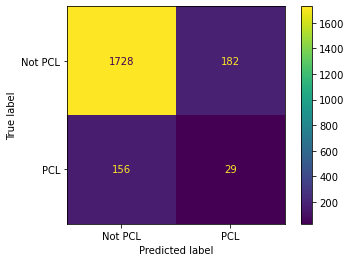

In [253]:
disp.plot()

In [119]:
final_weights

[0.7599999999971128,
 -0.02200000000088774,
 0.8670000000054513,
 -0.07900000000248705,
 -3.0819999999644754]